## Processamento de arquivos HDF5

Este script processa arquivos no formato HDF5. Primeiramente exploramos o conteúdo do *dataset* com o GDAL e depois processamos as variáveis de interesse.

Versão: 0.1 

Bugs and contact: Márcio Teixeira   mjt@if.usp.br  & Pedro Tavares pedrotavares@usp.br  


1. Usando o GDAL para ter informaçoes sobre os campos dos arquivos que queremos importar 

In [1]:
import subprocess


path = "C:\\Users\\Marcio\\Desktop\\OMI\\teste1.he5"

cmd = ['gdalinfo', path]
my_process = subprocess.Popen(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

output, error_msg = my_process.communicate()


print(output.decode('utf-8'))

Driver: HDF5/Hierarchical Data Format Release 5
Files: C:\Users\Marcio\Desktop\OMI\teste1.he5
Size is 512, 512
Metadata:
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_EndUTC=2007-12-27T11:45:00.000000Z
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_GranuleDay=26 
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_GranuleDayOfYear=360 
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_GranuleMonth=12 
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_GranuleYear=2007 
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_InstrumentName=OMI
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_OrbitNumber=18315 18316 18317 18318 18319 18320 18321 18322 18323 18324 18325 18326 18327 18328 18329 18330 18331 18332 18333 18334 18335 18336 18337 18338 18339 18340 18341 18342 18343 18344 18345 18346 18347 18348 18349 18350 18351 18352 18353 18354 18355 18356 18357 18358 18359 
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_OrbitPeriod=5933 5933 5933 5933 5933 5933 5933 5933 5933 5933 5933 5933 5933 5933 5933 5933 5933 5933 5933 5933 5933 5933 5933 5933 5933 5933 5933 5933 5933 5933 5933 5932 5933 5933 

### Possível solução alternativa

2. Lê recursivamente os niveis do HDF5. Com isso podemos usar os valores para acessar os elementos do HDF5. 

Ver seção "método manual"

In [2]:
import h5py
f = h5py.File(path)

for name in f:
    print(name,f.get(name,getclass=True))


def PrintName(name):
    print(name)
    
f.visit(PrintName)


HDFEOS <class 'h5py._hl.group.Group'>
HDFEOS INFORMATION <class 'h5py._hl.group.Group'>
HDFEOS
HDFEOS/ADDITIONAL
HDFEOS/ADDITIONAL/FILE_ATTRIBUTES
HDFEOS/GRIDS
HDFEOS/GRIDS/Aerosol NearUV Grid
HDFEOS/GRIDS/Aerosol NearUV Grid/Data Fields
HDFEOS/GRIDS/Aerosol NearUV Grid/Data Fields/CloudFraction
HDFEOS/GRIDS/Aerosol NearUV Grid/Data Fields/CloudOpticalDepth
HDFEOS/GRIDS/Aerosol NearUV Grid/Data Fields/FinalAerosolAbsOpticalDepth354
HDFEOS/GRIDS/Aerosol NearUV Grid/Data Fields/FinalAerosolAbsOpticalDepth388
HDFEOS/GRIDS/Aerosol NearUV Grid/Data Fields/FinalAerosolAbsOpticalDepth500
HDFEOS/GRIDS/Aerosol NearUV Grid/Data Fields/FinalAerosolOpticalDepth354
HDFEOS/GRIDS/Aerosol NearUV Grid/Data Fields/FinalAerosolOpticalDepth388
HDFEOS/GRIDS/Aerosol NearUV Grid/Data Fields/FinalAerosolOpticalDepth500
HDFEOS/GRIDS/Aerosol NearUV Grid/Data Fields/FinalAerosolSingleScattAlb354
HDFEOS/GRIDS/Aerosol NearUV Grid/Data Fields/FinalAerosolSingleScattAlb388
HDFEOS/GRIDS/Aerosol NearUV Grid/Data Field

In [23]:
cloud = f['HDFEOS/GRIDS/Aerosol NearUV Grid/Data Fields/CloudFraction']

In [26]:
import numpy as np 
n1 = np.array(f['HDFEOS/GRIDS/Aerosol NearUV Grid/Data Fields/CloudFraction'][:])
# data = f.get('HDFEOS/GRIDS/Aerosol NearUV Grid/Data Fields/CloudFraction').value

In [28]:
n1.shape

(180, 360)

In [15]:
cloud.items

AttributeError: 'Dataset' object has no attribute 'items'

In [3]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap
import numpy as np
import h5py

## Metodo manual

In [16]:
f = h5py.File(path)

list(f.keys())


['HDFEOS', 'HDFEOS INFORMATION']

In [17]:
dset = f['HDFEOS']

print(list(dset.keys()))

grids = dset['GRIDS/']

print(list(grids.values()))

aero = grids['Aerosol NearUV Grid/Data Fields']

print(list(aero))


['ADDITIONAL', 'GRIDS']
[<HDF5 group "/HDFEOS/GRIDS/Aerosol NearUV Grid" (1 members)>]
['CloudFraction', 'CloudOpticalDepth', 'FinalAerosolAbsOpticalDepth354', 'FinalAerosolAbsOpticalDepth388', 'FinalAerosolAbsOpticalDepth500', 'FinalAerosolOpticalDepth354', 'FinalAerosolOpticalDepth388', 'FinalAerosolOpticalDepth500', 'FinalAerosolSingleScattAlb354', 'FinalAerosolSingleScattAlb388', 'FinalAerosolSingleScattAlb500', 'UVAerosolIndex']


In [21]:
dset2 = f['HDFEOS/GRIDS/Aerosol NearUV Grid/Data Fields']
print(list(dset2.keys()))

cloud = f['HDFEOS/GRIDS/Aerosol NearUV Grid/Data Fields/CloudFraction']

print(cloud.shape)
print(cloud.__class__)

['CloudFraction', 'CloudOpticalDepth', 'FinalAerosolAbsOpticalDepth354', 'FinalAerosolAbsOpticalDepth388', 'FinalAerosolAbsOpticalDepth500', 'FinalAerosolOpticalDepth354', 'FinalAerosolOpticalDepth388', 'FinalAerosolOpticalDepth500', 'FinalAerosolSingleScattAlb354', 'FinalAerosolSingleScattAlb388', 'FinalAerosolSingleScattAlb500', 'UVAerosolIndex']
(180, 360)
<class 'h5py._hl.dataset.Dataset'>


## Metodo Automatico

Ongoing. Por algum motivo a recursão não funciona. Talvez tenha que se extrair os campos manualmente mesmo como acima e automatizar o *loop* do modo feito para o HDF

COnseguimos resolver este problema lá em cima usando a "solução alternativa"!!!


In [104]:
import h5py
filename = path

with h5py.File(filename, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[0]

    # get the object type for a_group_key: usually group or dataset
    print(type(f[a_group_key])) 

    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    data = list(f[a_group_key])

    # If a_group_key is a dataset name, 
    # this gets the dataset values and returns as a list
    data = list(f[a_group_key])
    # preferred methods to get dataset values:
    ds_obj = f[a_group_key]      # returns as a h5py dataset object
    ds_arr = f[a_group_key][()]  # returns as a numpy array

Keys: <KeysViewHDF5 ['HDFEOS', 'HDFEOS INFORMATION']>
<class 'h5py._hl.group.Group'>


In [114]:
data

['ADDITIONAL', 'GRIDS']

In [9]:
# test cell: open file and get components

# filename = "C:\Users\mteix\Desktop\Deposit\2010\OMI-Aura_L3-OMAERUVd_2010m0101_v003-2017m0821t150309.he5"

# hdf = SD(path, SDC.READ)

# # Uncomment to open *filename*  and list available SDS datasets
# hdf = SD(filename, SDC.READ)
# print (hdf.datasets())

# co_meas = GetHDFData(hdf,'CO_VMR_A','CO_VMR_D')

HDF4Error: SD (15): File is supported, must be either hdf, cdf, netcdf

### Parte 1

Agregam-se os arquivos por mês e geram-se os CSVs. A agregação mensal é feita por conta do projeto MapBiomasAr e pode ser facilmente alterada pelo usuário



In [ ]:
# this loop will read all the files in a per month basis and aggregate
import glob
import time
yr = list(range(2015,2021))
mon = ['01','02','03','04','05','06',
       '07','08','09','10','11','12']
# mon = ['07','08', '09']
# yr = ['2003','2013']
data1 = 'CO_VMR_A'
data2 = 'CO_VMR_D'


# my_path = 'C:\\Users\\mteix\\Desktop\\testData\\' #win style needs '\\'

my_path = '/home/mapbiomasar/Mayra/AIRS/AIRS_L3/CH4_CO_L3_2002_today/'


start_time = time.time()
# df = pd.DataFrame(columns = ['lat','lon','co_asc','co_desc'])
for y in yr:
    print('PROCESSING: ', y, ' files')
    for m in mon:
        path_file = my_path + 'AIRS.' + str(y) + '.'+ m +'.' + '*.hdf'
        
        # gambi 1: zera o vetor que armazena os valores mensais
        # define o novo df que sera exportado
        tmp = np.empty([1,4])
        tmp[:] = np.nan
        df = pd.DataFrame(columns = ['lat','lon','co_asc','co_desc'])
        
        for filename in glob.glob(path_file):
            # print(filename)
            try:
                hdf = SD(filename, SDC.READ)
                co_meas = GetHDFData(hdf,data1,data2)
                tmp  = np.vstack([tmp,co_meas])
            except:
                print("Could not open ", filename)
                break

        # build df with the time information
        df2 = pd.DataFrame(tmp,columns = ['lat','lon','co_asc','co_desc'])
        df2['time'] = str(y) + '-' + m
        df = pd.concat([df,df2])
        df = df.dropna()
            
        # process the monthly files and export to CSV
        # (this will avoid python to crash due to memory issues)
        df_co = df.groupby(['time','lat','lon']).mean().reset_index()
        df_co.to_csv(my_path + 'CO_' + str(y) + '_' + m + '.csv')
        df.co = None
        
print('Processing time:', (time.time()-start_time)/60 , ' min')


### Parte 2

Aqui lemos os CSVs produzidos na parte 1 e os transformamos em *shapefiles*. É mais fácil subir esses arquivos para o GEE que imagens.

In [ ]:
# build geopandas dataframes

import geopandas as gpd 
import glob
from shapely.geometry import Polygon, Point, MultiPolygon

# turn off warnings (should I care for them?)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# read file from csv to export shapes
# IMPORTANT: Use "\\" to read from a Windows filesystem
my_path = 'C:\\Users\\mteix\\Desktop\\testData\\'

# loop to read files
for filename in glob.glob(my_path + '/*.csv'):
    
    # TODO: make a smarter slicing (this is the quick and dirty solution)
    my_filename  = filename[-14:]
    my_filename = my_filename[:-4]
    print('Processing: ' + my_filename)
    try:                
        df = pd.read_csv(filename)
        # drop the 'ghost' column
        df.drop('Unnamed: 0', inplace=True, axis=1)
        crs = {'init':'EPSG:4326'}
        geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]

        points = gpd.GeoDataFrame(df, 
                                crs = crs, 
                                geometry = geometry)

        # optional: filter to a square covering South America
        min_lat = -57.5858
        max_lat =  15.5988
        min_lon = -85.8360
        max_lon = -35.8750

        # back to original nomenclature
        tmp = points.copy()
        lat_filter = (tmp["lat"] >= min_lat) & (tmp["lat"] <= max_lat)
        lon_filter = (tmp["lon"] >= min_lon) & (tmp["lon"] <= max_lon)

        # tmp = tmp.loc[lat_filter & lon_filter]

        points = tmp[lat_filter & lon_filter]

        # The value of the buffer should be changed 
        # according to grid specified in file Metadata
        # this example we have a 1 x 1 degree grid
        buffers = points.buffer(0.5) 
        bounds = buffers.bounds

        bounds['pixel_area'] = bounds.apply(
        lambda obj: Polygon(shell=[
            Point(obj['maxx'],obj['miny']),
            Point(obj['minx'],obj['miny']),
            Point(obj['minx'],obj['maxy']),
            Point(obj['maxx'],obj['maxy']),
            Point(obj['maxx'],obj['miny']),
        ]),
        axis=1
        )

        # adding indexes to merge dataframes
        points.insert(0, 'New_ID', range(1, 1 + len(points)))
        bounds.insert(0, 'New_ID', range(1, 1 + len(bounds)))

        my_merge = bounds.merge(points, on='New_ID')

        gdf = my_merge
        gdf = gpd.GeoDataFrame(
            gdf,
            crs = {'init':'EPSG:4326'}, 
            geometry = [a for a in gdf['pixel_area']]                               
            )
        gdf = gdf.reset_index()
        gdf = gdf.loc[:,gdf.columns.isin(['co_asc','co_desc','geometry'])]
        gdf.to_file(my_path + 'shapefiles\\' + my_filename + '.shp')

    except:
        print("Could not open ", filename[-14:])
        continue



### Opcional: visualização 

Depois da conversão para *geodataframe*, use esta área para uma rápida visualização dos dados

c:\Users\mteix\miniconda3\envs\gee\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:>

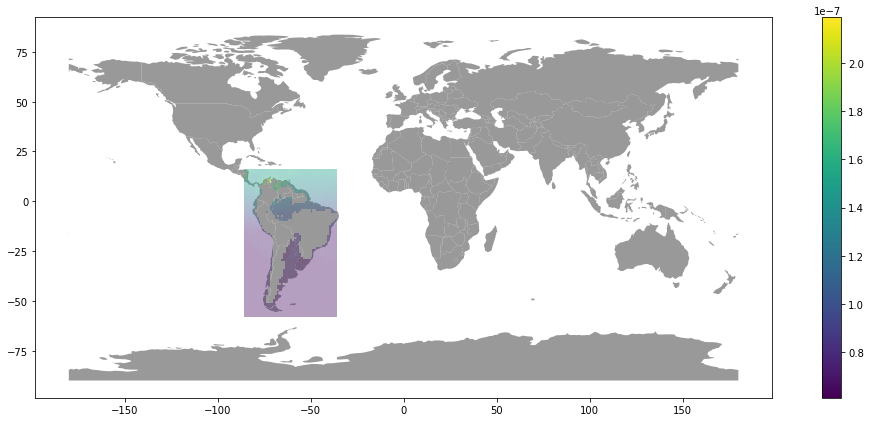

In [16]:
# testing the view
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(18, 7))


# ax.set_xlim(178.0, 181.0)
# ax.set_ylim(20.0, 23.0)
world.plot(ax=ax, alpha=0.8, color='grey')

gpd.GeoDataFrame(
  my_merge,
  crs = crs, 
  geometry = [a for a in my_merge['pixel_area']]                                
  ).plot(column='co_asc', ax=ax, legend=True,alpha = 0.4)

plt.title('Visualization test')
